In [1]:
from autoencoders import JointAutoencoderSuite, flatten_trajectories, get_torus_projection, SnProjection, IdProjection
import experiments
import torch
import numpy as np
import onnx
import matplotlib.pyplot as plt
from utils import pend_dynamics, ho_dynamics, dp_le_dynamics, co_dynamics, kp_dynamics
import onnxruntime
from utils import circular_dynamics
from autoencoders.losses import ProbabilisticLoss, JointAEOrthogonalityLoss, CombinedLoss, MSELoss, RegularizationLoss

/home/antony/manifold project/ai-prentice-conservation-laws/autoencoders/contrastive_train.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
/home/antony/.local/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/antony/.local/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to Tru

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

# All

In [2]:
conserved_args = {
    "intermediate_dim": 128,
    "intermediate_layers": 6,
}
joint_ae_args = {
    "intermediate_dim": 128,
    "intermediate_layers": 6,
}
extract_dynamics_lst = [pend_dynamics, ho_dynamics, dp_le_dynamics, None, co_dynamics, kp_dynamics]
for experiment, extract_dynamics, periodic_dim in np.array(list(zip(experiments.common_experiments, extract_dynamics_lst, [1, 1, 2, 0, 2, 1])))[[0, 1, 2, 4, 5]]:
    print(experiment.experiment_name)
    joint_ae_args["periodic_dim"] = periodic_dim
    suite = JointAutoencoderSuite(experiment, conserved_args=conserved_args, joint_ae_args=joint_ae_args)
    suite.train_all(extract_dynamics=extract_dynamics)
    print("\n")

NameError: name 'pend_dynamics' is not defined

# Pendulum

In [2]:
p_data = np.load("trajectories/pendulum.npz")["data"]

Using cpu device...
Constructing UMAP embedding
Finished preprocessing 120 events in 0.0008s
   714 / 7140  EMDs computed  -  10.00% completed - 0.750s
  1428 / 7140  EMDs computed  -  20.00% completed - 1.610s
  2142 / 7140  EMDs computed  -  30.00% completed - 2.431s
  2856 / 7140  EMDs computed  -  40.00% completed - 3.216s
  3570 / 7140  EMDs computed  -  50.00% completed - 4.251s
  4284 / 7140  EMDs computed  -  60.00% completed - 5.075s
  4998 / 7140  EMDs computed  -  70.00% completed - 6.157s
  5712 / 7140  EMDs computed  -  80.00% completed - 6.841s
  6426 / 7140  EMDs computed  -  90.00% completed - 7.945s
  7140 / 7140  EMDs computed  - 100.00% completed - 8.845s


/home/antony/.local/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")



Training conserved NN


100%|█████████████████████████████████████████████████████████████| 100/100 [03:54<00:00,  2.34s/it]


Best loss: 0.0010088242124766111

Training joint AE


100%|█████████████████████████████████████████████████████████████| 200/200 [16:08<00:00,  4.84s/it]


Best loss: 3.132978599751368e-05


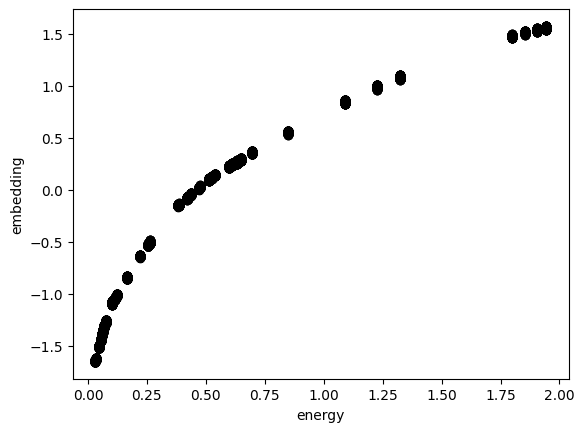

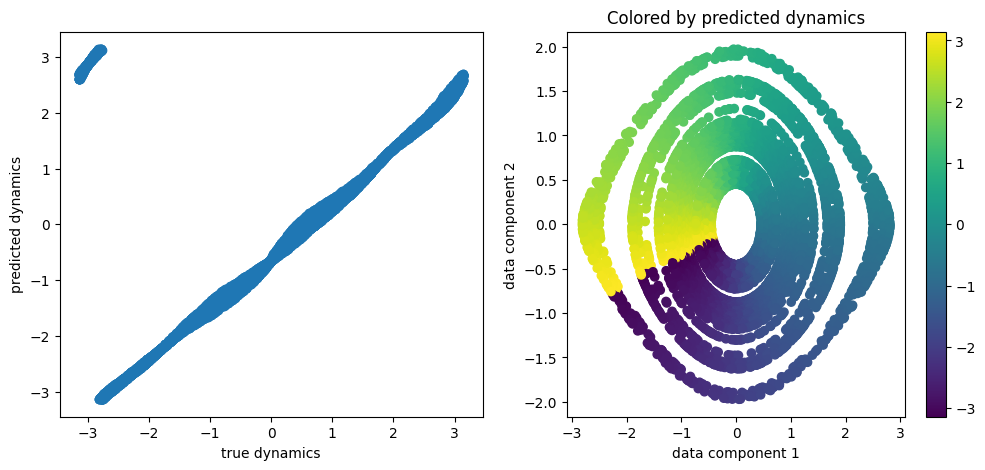

In [3]:
suite_pendulum = JointAutoencoderSuite(experiments.Pendulum, joint_ae_args={"projection": SnProjection(1), "intermediate_dim": 32, "intermediate_layers": 3})
conserved_pendulum, joint_ae_pendulum = suite_pendulum.train_all(save=False, extract_dynamics=circular_dynamics)

Using cpu device...
Constructing UMAP embedding
Finished preprocessing 120 events in 0.0006s
   714 / 7140  EMDs computed  -  10.00% completed - 0.756s
  1428 / 7140  EMDs computed  -  20.00% completed - 1.456s
  2142 / 7140  EMDs computed  -  30.00% completed - 2.383s
  2856 / 7140  EMDs computed  -  40.00% completed - 3.137s
  3570 / 7140  EMDs computed  -  50.00% completed - 3.991s
  4284 / 7140  EMDs computed  -  60.00% completed - 4.781s
  4998 / 7140  EMDs computed  -  70.00% completed - 5.656s
  5712 / 7140  EMDs computed  -  80.00% completed - 6.447s
  6426 / 7140  EMDs computed  -  90.00% completed - 7.259s
  7140 / 7140  EMDs computed  - 100.00% completed - 8.092s


/home/antony/.local/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")



Training conserved NN


100%|█████████████████████████████████████████████████████████████| 100/100 [03:55<00:00,  2.35s/it]


Best loss: 0.0011285730870440602

Training joint AE


100%|█████████████████████████████████████████████████████████████| 200/200 [24:42<00:00,  7.41s/it]


Best loss: 4.532578168436885e-05


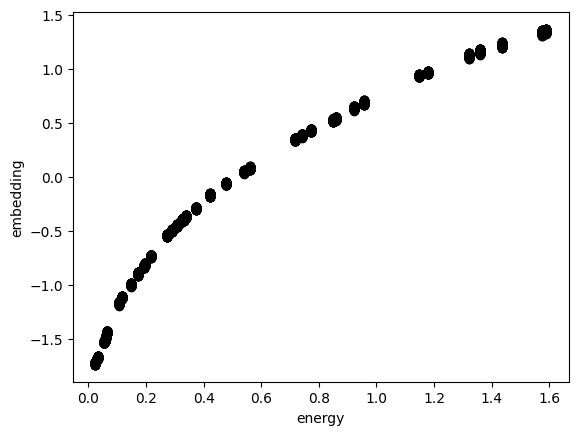

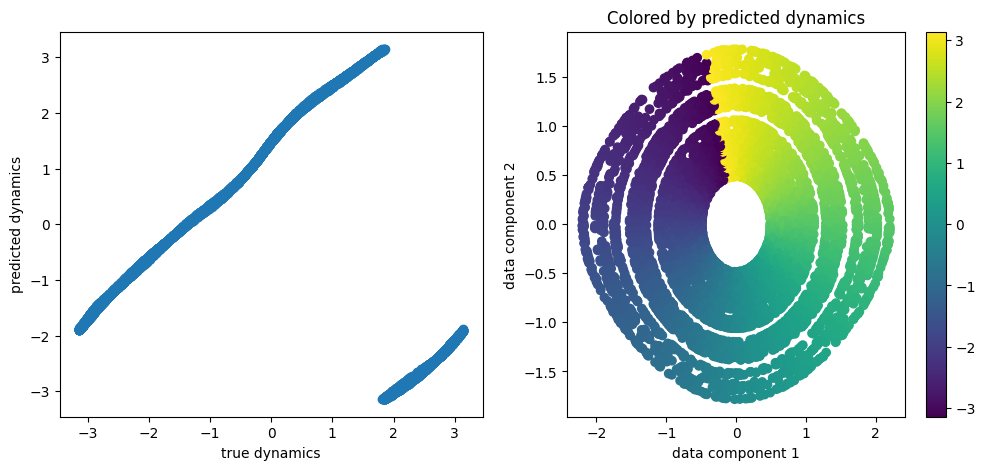

In [4]:
criterion_ae = CombinedLoss([MSELoss(), JointAEOrthogonalityLoss(), RegularizationLoss()])
suite_pendulum = JointAutoencoderSuite(experiments.Pendulum, joint_ae_args={"projection": SnProjection(1), "intermediate_dim": 32, "intermediate_layers": 3}, criterion_ae=criterion_ae)
conserved_pendulum, joint_ae_pendulum = suite_pendulum.train_all(save=False, extract_dynamics=circular_dynamics)

Using cpu device...
Constructing UMAP embedding
Finished preprocessing 120 events in 0.0008s
   714 / 7140  EMDs computed  -  10.00% completed - 0.839s
  1428 / 7140  EMDs computed  -  20.00% completed - 1.925s
  2142 / 7140  EMDs computed  -  30.00% completed - 2.950s
  2856 / 7140  EMDs computed  -  40.00% completed - 3.791s
  3570 / 7140  EMDs computed  -  50.00% completed - 4.563s
  4284 / 7140  EMDs computed  -  60.00% completed - 5.426s
  4998 / 7140  EMDs computed  -  70.00% completed - 6.184s
  5712 / 7140  EMDs computed  -  80.00% completed - 6.888s
  6426 / 7140  EMDs computed  -  90.00% completed - 7.633s
  7140 / 7140  EMDs computed  - 100.00% completed - 8.367s


/home/antony/.local/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")



Training conserved NN


100%|█████████████████████████████████████████| 100/100 [04:06<00:00,  2.46s/it]


Best loss: 0.002207618672400713

Training joint AE


100%|█████████████████████████████████████████| 200/200 [10:57<00:00,  3.29s/it]


Best loss: 0.0022391185630112886


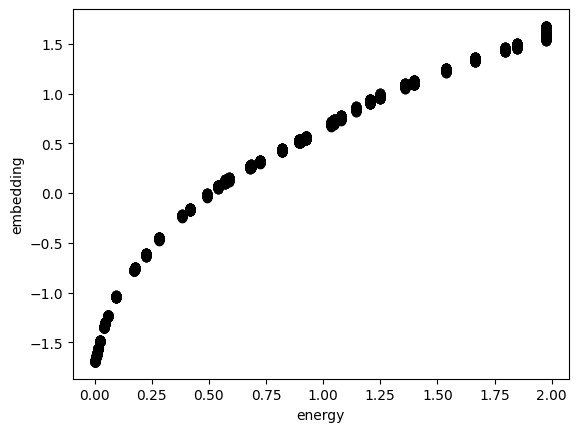

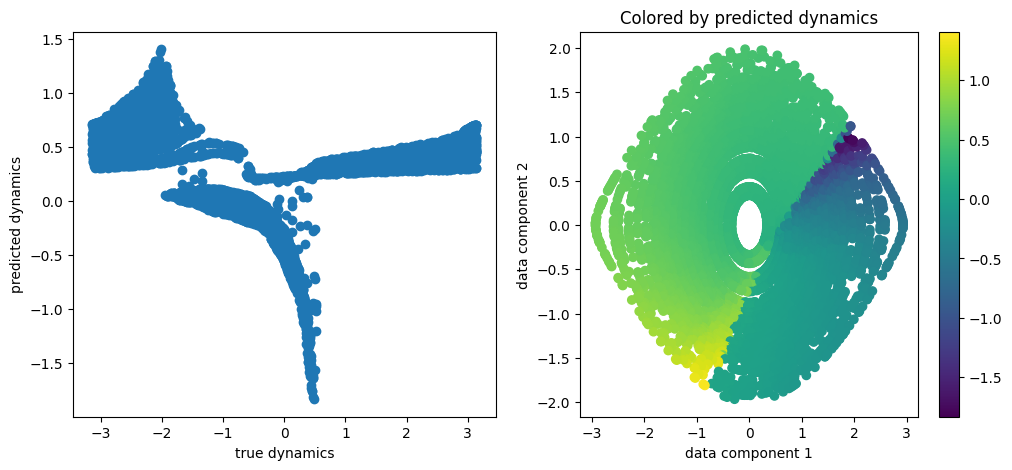

In [4]:
suite_pendulum = JointAutoencoderSuite(experiments.Pendulum, joint_ae_args={"projection": IdProjection(1), "intermediate_dim": 32, "intermediate_layers": 3})
conserved_pendulum, joint_ae_pendulum = suite_pendulum.train_all(save=False, extract_dynamics=circular_dynamics)

Using cpu device...
Constructing UMAP embedding


/home/antony/.local/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")



Training conserved NN


100%|██████████| 100/100 [03:21<00:00,  2.01s/it]


Best loss: 0.0007975274929776788

Training joint AE


100%|██████████| 200/200 [1:50:51<00:00, 33.26s/it]


Best loss: 0.011258482001721859


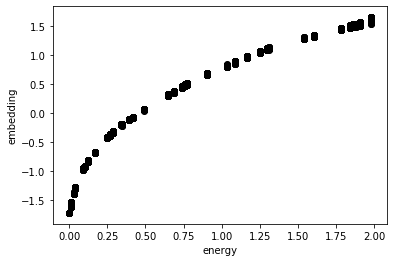

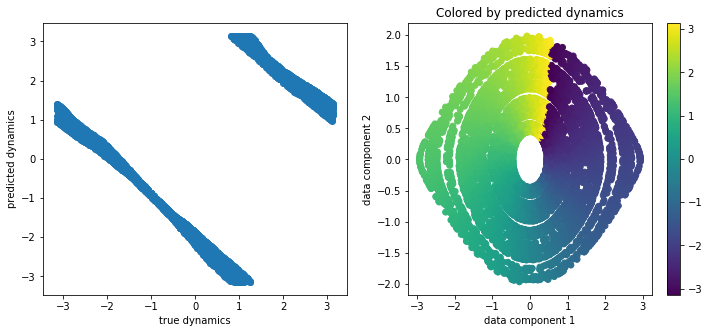

In [7]:
suite_pendulum_ = JointAutoencoderSuite(experiments.Pendulum, joint_ae_args={"projection": SnProjection(1), "intermediate_dim": 32, "intermediate_layers": 3}, criterion_ae=probabilistic_loss_joint_ae)
_, __ = suite_pendulum_.train_all(save=False, extract_dynamics=circular_dynamics)

In [4]:
# traj = p_data[3]

# plt.figure()
# plt.scatter(*traj.T)

# true_dynamics_traj = np.arccos(traj[:, 0] / (traj ** 2).sum(axis=1) ** 0.5) * np.sign(traj[:, 1])
# ae_dynamics_traj = joint_ae_pendulum.extract_dynamics(torch.tensor(traj, dtype=torch.float32)).detach()
# dyn_x = torch.cos(ae_dynamics_traj)
# dyn_y = torch.sin(ae_dynamics_traj)

# plt.figure()
# plt.scatter(dyn_x, dyn_y, c=true_dynamics_traj)

# whole_data = torch.tensor(p_data.reshape(p_data.shape[0] * p_data.shape[1], -1), dtype=torch.float32)
# true_dynamics = circular_dynamics(whole_data)
# ae_dynamics = joint_ae_pendulum.extract_dynamics(torch.tensor(whole_data, dtype=torch.float32)).detach()

# plt.figure()
# plt.scatter(*whole_data.T, c=ae_dynamics)

# mask = (whole_data ** 2).sum(axis=1) > 1
# plt.figure()
# plt.scatter(true_dynamics[mask], ae_dynamics[mask])

# Coupled oscillator

In [5]:
co_data = np.load("trajectories/coupled_oscillator.npz")["data"]

Using cpu device...
Constructing UMAP embedding
Finished preprocessing 120 events in 0.0013s
   714 / 7140  EMDs computed  -  10.00% completed - 0.735s
  1428 / 7140  EMDs computed  -  20.00% completed - 1.368s
  2142 / 7140  EMDs computed  -  30.00% completed - 2.006s
  2856 / 7140  EMDs computed  -  40.00% completed - 2.657s
  3570 / 7140  EMDs computed  -  50.00% completed - 3.478s
  4284 / 7140  EMDs computed  -  60.00% completed - 4.187s
  4998 / 7140  EMDs computed  -  70.00% completed - 4.985s
  5712 / 7140  EMDs computed  -  80.00% completed - 5.722s
  6426 / 7140  EMDs computed  -  90.00% completed - 6.488s
  7140 / 7140  EMDs computed  - 100.00% completed - 7.172s


/home/antony/.local/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")



Training conserved NN


100%|█████████████████████████████████████████████████████████████| 100/100 [03:27<00:00,  2.08s/it]


Best loss: 0.0044898781925439835

Training joint AE


100%|█████████████████████████████████████████████████████████████| 200/200 [17:02<00:00,  5.11s/it]


Best loss: 0.0012893705861642957


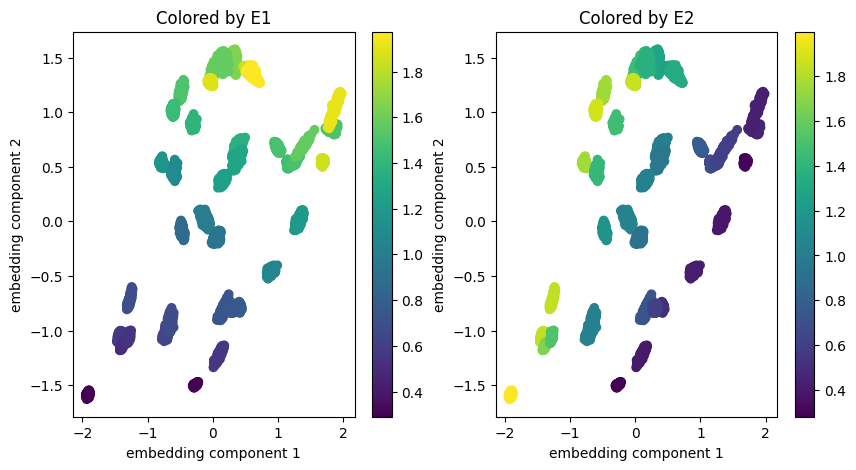

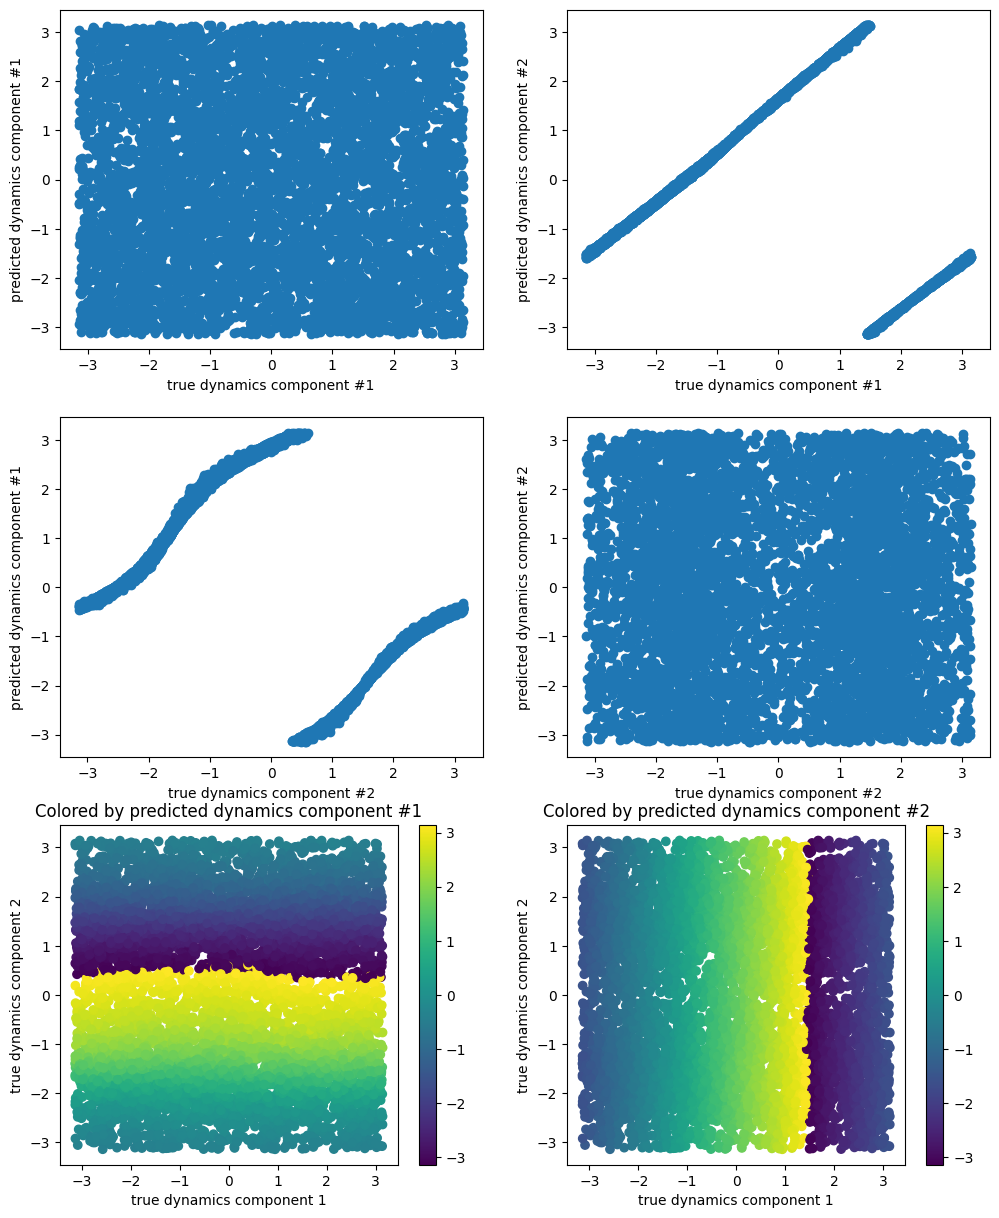

In [6]:
joint_ae_args = {
    "intermediate_dim": 64,
    "intermediate_layers": 4,
    "projection": get_torus_projection()
}
# suite_co = JointAutoencoderSuite(experiments.CoupledOscillator, joint_ae_args=joint_ae_args, criterion_ae=probabilistic_loss_joint_ae)
suite_co = JointAutoencoderSuite(experiments.CoupledOscillator, joint_ae_args=joint_ae_args)
conserved_co, joint_ae_co = suite_co.train_all(save=False, extract_dynamics=co_dynamics)

Using cpu device...
Constructing UMAP embedding
Finished preprocessing 120 events in 0.0006s
   714 / 7140  EMDs computed  -  10.00% completed - 0.551s
  1428 / 7140  EMDs computed  -  20.00% completed - 1.159s
  2142 / 7140  EMDs computed  -  30.00% completed - 1.703s
  2856 / 7140  EMDs computed  -  40.00% completed - 2.249s
  3570 / 7140  EMDs computed  -  50.00% completed - 2.813s
  4284 / 7140  EMDs computed  -  60.00% completed - 3.356s
  4998 / 7140  EMDs computed  -  70.00% completed - 3.905s
  5712 / 7140  EMDs computed  -  80.00% completed - 4.450s
  6426 / 7140  EMDs computed  -  90.00% completed - 4.984s
  7140 / 7140  EMDs computed  - 100.00% completed - 5.534s


/home/antony/.local/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")



Training conserved NN


100%|█████████████████████████████████████████████████████████████| 100/100 [03:00<00:00,  1.80s/it]


Best loss: 0.005625559948384762

Training joint AE


100%|█████████████████████████████████████████████████████████████| 200/200 [51:13<00:00, 15.37s/it]


Best loss: 0.00213616993278265


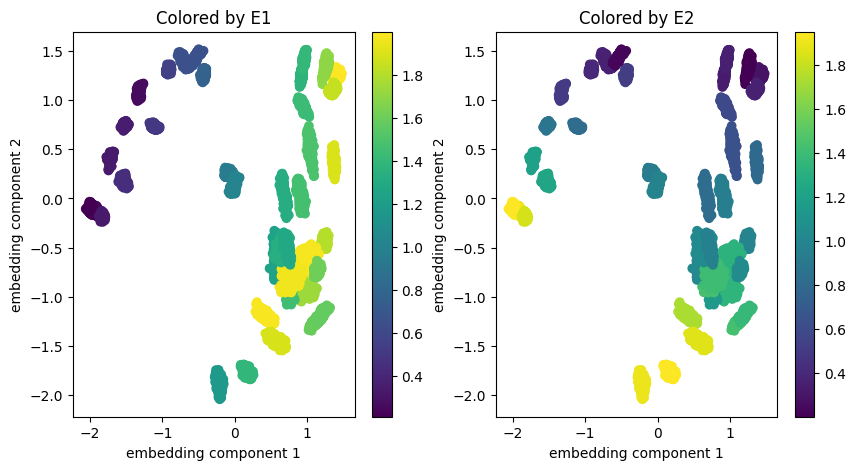

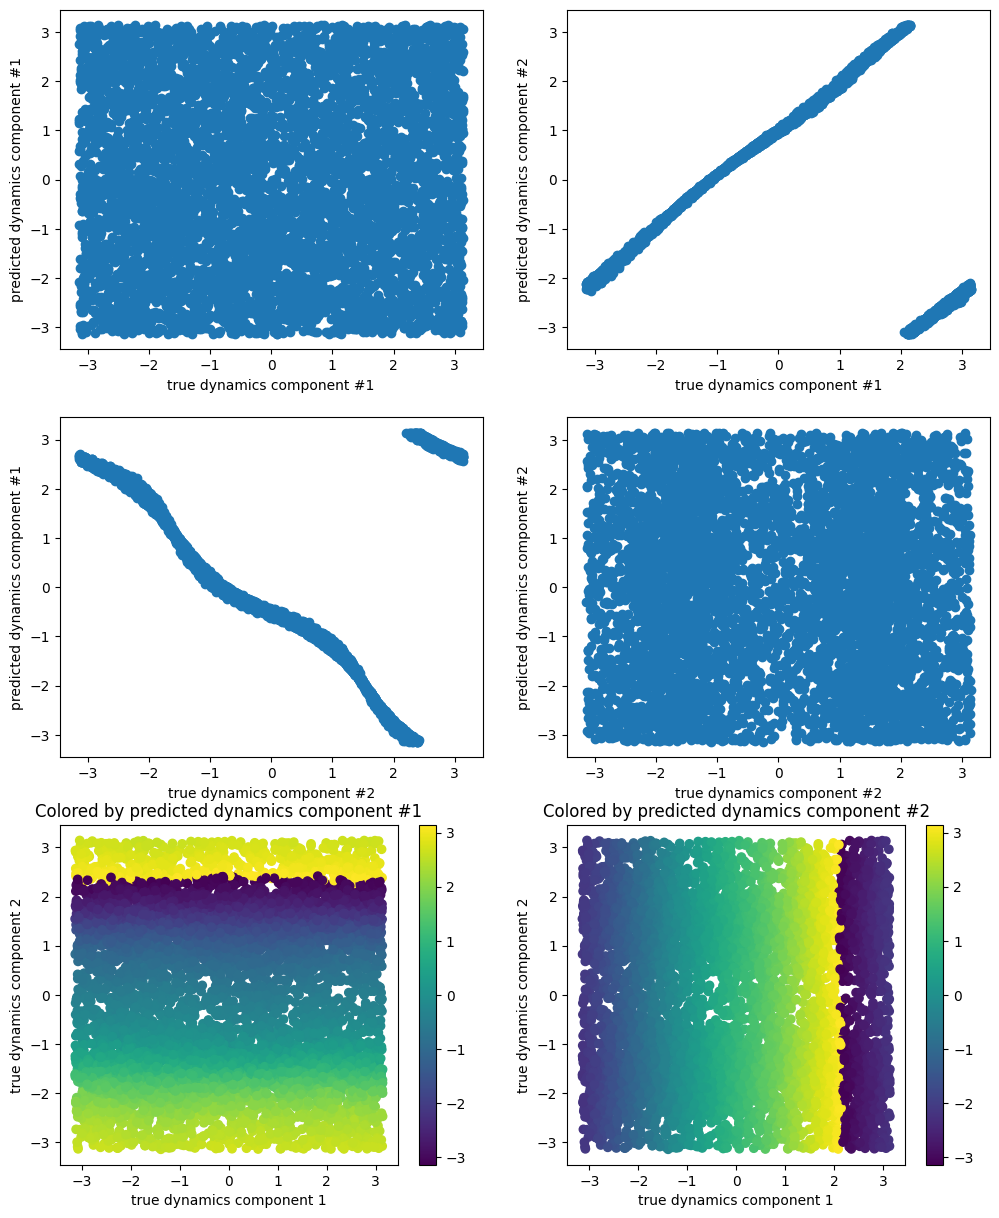

In [2]:
joint_ae_args = {
    "intermediate_dim": 64,
    "intermediate_layers": 4,
    "projection": get_torus_projection()
}
# suite_co = JointAutoencoderSuite(experiments.CoupledOscillator, joint_ae_args=joint_ae_args, criterion_ae=probabilistic_loss_joint_ae)
lam = 1e-5
criterion_ae = CombinedLoss([MSELoss(), JointAEOrthogonalityLoss(lam=lam), JointAEOrthogonalityLoss(lam=lam)])
suite_co = JointAutoencoderSuite(experiments.CoupledOscillator, joint_ae_args=joint_ae_args, criterion_ae=criterion_ae)
conserved_co, joint_ae_co = suite_co.train_all(save=False, extract_dynamics=co_dynamics)

Using cpu device...
Constructing UMAP embedding
Finished preprocessing 120 events in 0.0008s
   714 / 7140  EMDs computed  -  10.00% completed - 0.565s
  1428 / 7140  EMDs computed  -  20.00% completed - 1.103s
  2142 / 7140  EMDs computed  -  30.00% completed - 1.646s
  2856 / 7140  EMDs computed  -  40.00% completed - 2.192s
  3570 / 7140  EMDs computed  -  50.00% completed - 2.732s
  4284 / 7140  EMDs computed  -  60.00% completed - 3.267s
  4998 / 7140  EMDs computed  -  70.00% completed - 3.811s
  5712 / 7140  EMDs computed  -  80.00% completed - 4.390s
  6426 / 7140  EMDs computed  -  90.00% completed - 4.926s
  7140 / 7140  EMDs computed  - 100.00% completed - 5.477s


/home/antony/.local/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")



Training conserved NN


100%|█████████████████████████████████████████████████████████████| 100/100 [03:23<00:00,  2.03s/it]


Best loss: 0.005548394750803709

Training joint AE


100%|███████████████████████████████████████████████████████████| 200/200 [1:00:06<00:00, 18.03s/it]


Best loss: 0.0018650386482477188


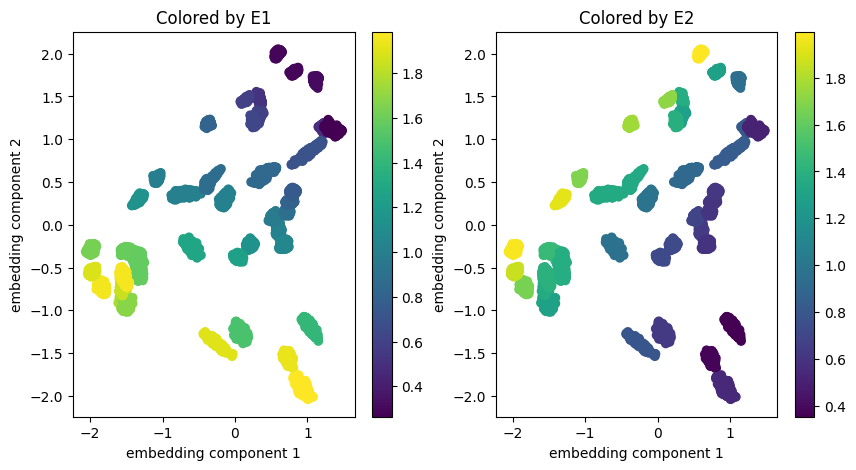

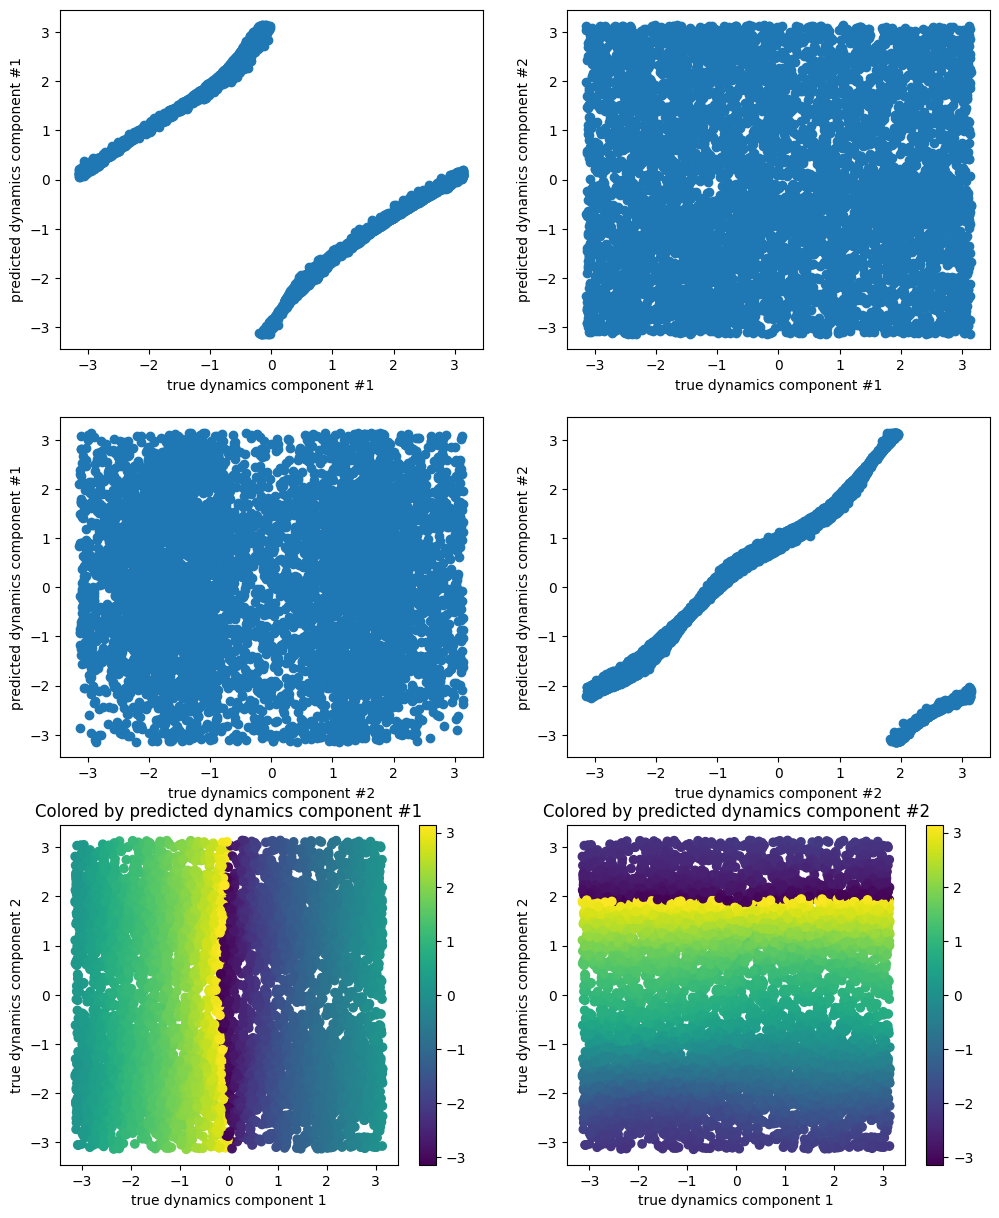

In [3]:
joint_ae_args = {
    "intermediate_dim": 64,
    "intermediate_layers": 4,
    "projection": get_torus_projection()
}
# suite_co = JointAutoencoderSuite(experiments.CoupledOscillator, joint_ae_args=joint_ae_args, criterion_ae=probabilistic_loss_joint_ae)
lam = 1e-4
criterion_ae = CombinedLoss([MSELoss(), JointAEOrthogonalityLoss(lam=lam), JointAEOrthogonalityLoss(lam=lam)])
suite_co = JointAutoencoderSuite(experiments.CoupledOscillator, joint_ae_args=joint_ae_args, criterion_ae=criterion_ae)
conserved_co, joint_ae_co = suite_co.train_all(save=False, extract_dynamics=co_dynamics)

In [ ]:
joint_ae_args = {
    "intermediate_dim": 64,
    "intermediate_layers": 4,
    "projection": get_torus_projection()
}
# suite_co = JointAutoencoderSuite(experiments.CoupledOscillator, joint_ae_args=joint_ae_args, criterion_ae=probabilistic_loss_joint_ae)
criterion_ae = CombinedLoss([MSELoss(), JointAEOrthogonalityLoss(lam=1e-7), JointAEOrthogonalityLoss(lam=1e-7)])
suite_co = JointAutoencoderSuite(experiments.CoupledOscillator, joint_ae_args=joint_ae_args, criterion_ae=criterion_ae)
conserved_co, joint_ae_co = suite_co.train_all(save=False, extract_dynamics=co_dynamics)

Using cpu device...
Constructing UMAP embedding
Finished preprocessing 120 events in 0.0013s
   714 / 7140  EMDs computed  -  10.00% completed - 0.556s
  1428 / 7140  EMDs computed  -  20.00% completed - 1.110s
  2142 / 7140  EMDs computed  -  30.00% completed - 1.646s
  2856 / 7140  EMDs computed  -  40.00% completed - 2.227s
  3570 / 7140  EMDs computed  -  50.00% completed - 2.803s
  4284 / 7140  EMDs computed  -  60.00% completed - 3.389s
  4998 / 7140  EMDs computed  -  70.00% completed - 3.953s
  5712 / 7140  EMDs computed  -  80.00% completed - 4.499s
  6426 / 7140  EMDs computed  -  90.00% completed - 5.037s
  7140 / 7140  EMDs computed  - 100.00% completed - 5.572s


/home/antony/.local/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")



Training conserved NN


100%|█████████████████████████████████████████████████████████████| 100/100 [03:29<00:00,  2.10s/it]


Best loss: 0.008486175909638405

Training joint AE


 68%|██████████████████████████████████████▍                  | 135/200 [5:49:45<1:27:51, 81.09s/it]

Using cpu device...
Constructing UMAP embedding
Finished preprocessing 120 events in 0.0006s
   714 / 7140  EMDs computed  -  10.00% completed - 0.649s
  1428 / 7140  EMDs computed  -  20.00% completed - 1.325s
  2142 / 7140  EMDs computed  -  30.00% completed - 2.017s
  2856 / 7140  EMDs computed  -  40.00% completed - 2.668s
  3570 / 7140  EMDs computed  -  50.00% completed - 3.345s
  4284 / 7140  EMDs computed  -  60.00% completed - 4.094s
  4998 / 7140  EMDs computed  -  70.00% completed - 4.780s
  5712 / 7140  EMDs computed  -  80.00% completed - 5.398s
  6426 / 7140  EMDs computed  -  90.00% completed - 6.181s
  7140 / 7140  EMDs computed  - 100.00% completed - 6.983s


/home/antony/.local/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")



Training conserved NN


100%|█████████████████████████████████████████| 100/100 [02:47<00:00,  1.68s/it]


Best loss: 0.007819242775440216

Training joint AE


100%|█████████████████████████████████████████| 200/200 [12:03<00:00,  3.62s/it]


Best loss: 0.005135363899171352


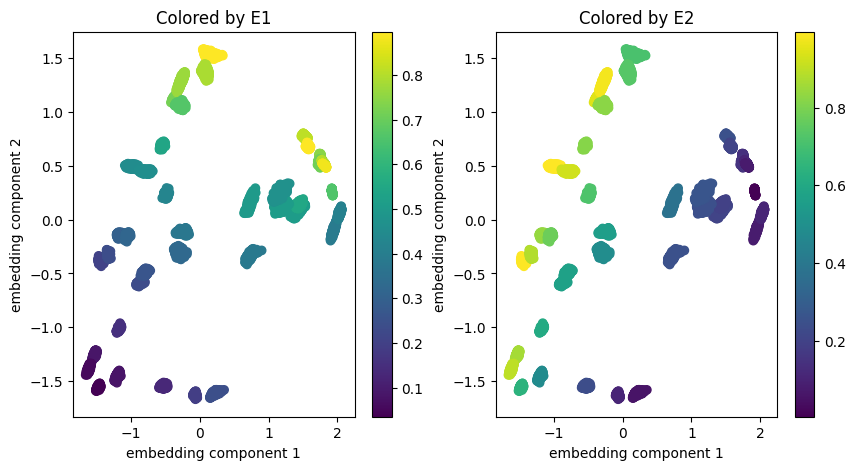

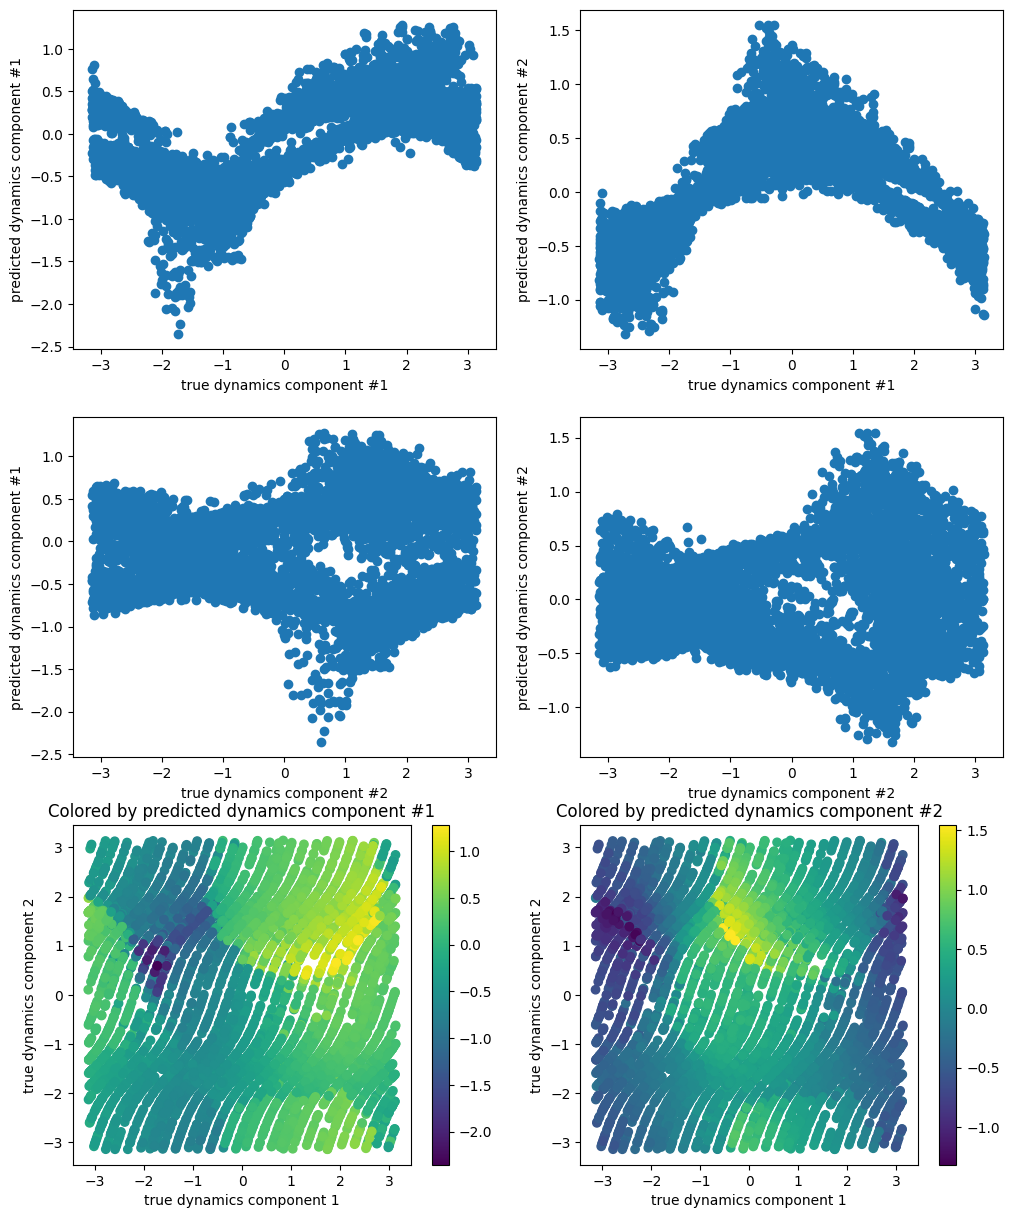

In [7]:
joint_ae_args = {
    "intermediate_dim": 64,
    "intermediate_layers": 4,
    "projection": IdProjection(2)
}
# suite_co = JointAutoencoderSuite(experiments.CoupledOscillator, joint_ae_args=joint_ae_args, criterion_ae=probabilistic_loss_joint_ae)
suite_co = JointAutoencoderSuite(experiments.CoupledOscillator, joint_ae_args=joint_ae_args)
conserved_co, joint_ae_co = suite_co.train_all(save=False, extract_dynamics=co_dynamics)

In [ ]:
data = flatten_trajectories(co_data)

true_dynamics = co_dynamics(torch.tensor(data, dtype=torch.float32))
predicted_dynamics = joint_ae_co.extract_dynamics(torch.tensor(data, dtype=torch.float32)).detach()

mask = (data ** 2).sum(axis=1) > 1

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].scatter(*true_dynamics.T, c=predicted_dynamics[:, 0])
axes[1].scatter(*true_dynamics.T, c=predicted_dynamics[:, 1])

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
for i, j in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    axes[i, j].scatter(true_dynamics[:, i][mask], predicted_dynamics[:, j][mask])

In [ ]:
_, joint_ae_co_nonperiodic = suite_co.train_all(periodic_dim=2, save=False)

In [ ]:
data = flatten_trajectories(co_data)

true_dynamics = co_dynamics(data)
predicted_dynamics = joint_ae_co_nonperiodic.extract_dynamics(torch.tensor(data, dtype=torch.float32)).detach()

mask = (data ** 2).sum(axis=1) > 1

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].scatter(*true_dynamics.T, c=predicted_dynamics[:, 0])
axes[1].scatter(*true_dynamics.T, c=predicted_dynamics[:, 1])

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
for i, j in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    axes[i, j].scatter(true_dynamics[:, i][mask], predicted_dynamics[:, j][mask])

# Double pendulum

Using cpu device...
Constructing UMAP embedding
Finished preprocessing 120 events in 0.0010s
   714 / 7140  EMDs computed  -  10.00% completed - 4.771s
  1428 / 7140  EMDs computed  -  20.00% completed - 9.548s
  2142 / 7140  EMDs computed  -  30.00% completed - 15.564s
  2856 / 7140  EMDs computed  -  40.00% completed - 21.141s
  3570 / 7140  EMDs computed  -  50.00% completed - 26.591s
  4284 / 7140  EMDs computed  -  60.00% completed - 31.731s
  4998 / 7140  EMDs computed  -  70.00% completed - 36.855s
  5712 / 7140  EMDs computed  -  80.00% completed - 41.745s
  6426 / 7140  EMDs computed  -  90.00% completed - 46.565s
  7140 / 7140  EMDs computed  - 100.00% completed - 51.609s


/home/antony/.local/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")



Training conserved NN


100%|█████████████████████████████████████████| 100/100 [05:32<00:00,  3.32s/it]


Best loss: 0.011558109894394875

Training joint AE


100%|█████████████████████████████████████████| 200/200 [28:38<00:00,  8.59s/it]


Best loss: 0.0023214458487927914


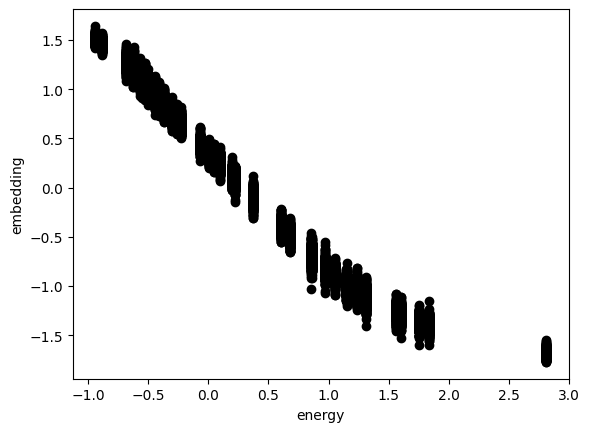

In [14]:
joint_ae_args = {
    "intermediate_dim": 64,
    "intermediate_layers": 4,
    "projection": IdProjection(3)
}
suite_dp = JointAutoencoderSuite(experiments.DoublePendulumHighEnergy, joint_ae_args=joint_ae_args)
conserved_dp, joint_ae_dp = suite_dp.train_all(save=False)

Using cpu device...
Constructing UMAP embedding
Finished preprocessing 120 events in 0.0020s
   714 / 7140  EMDs computed  -  10.00% completed - 5.206s
  1428 / 7140  EMDs computed  -  20.00% completed - 10.358s
  2142 / 7140  EMDs computed  -  30.00% completed - 15.401s
  2856 / 7140  EMDs computed  -  40.00% completed - 20.514s
  3570 / 7140  EMDs computed  -  50.00% completed - 25.666s
  4284 / 7140  EMDs computed  -  60.00% completed - 30.783s
  4998 / 7140  EMDs computed  -  70.00% completed - 36.058s
  5712 / 7140  EMDs computed  -  80.00% completed - 41.338s
  6426 / 7140  EMDs computed  -  90.00% completed - 46.607s
  7140 / 7140  EMDs computed  - 100.00% completed - 51.697s


/home/antony/.local/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")



Training conserved NN


100%|█████████████████████████████████████████| 100/100 [05:53<00:00,  3.53s/it]


Best loss: 0.009165016002953053

Training joint AE


100%|█████████████████████████████████████████| 200/200 [26:24<00:00,  7.92s/it]


Best loss: 0.0012668168637901545


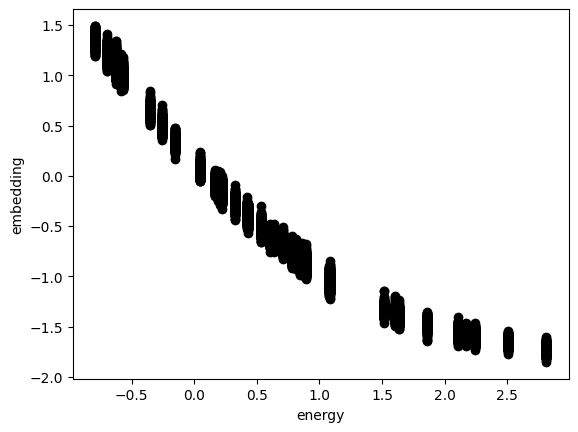

In [15]:
joint_ae_args = {
    "intermediate_dim": 64,
    "intermediate_layers": 4,
    "projection": SnProjection(3)
}
suite_dp = JointAutoencoderSuite(experiments.DoublePendulumHighEnergy, joint_ae_args=joint_ae_args)
conserved_dp, joint_ae_dp = suite_dp.train_all(save=False)

Using cpu device...
Constructing UMAP embedding
Finished preprocessing 120 events in 0.0009s
   714 / 7140  EMDs computed  -  10.00% completed - 4.921s
  1428 / 7140  EMDs computed  -  20.00% completed - 9.900s
  2142 / 7140  EMDs computed  -  30.00% completed - 14.938s
  2856 / 7140  EMDs computed  -  40.00% completed - 19.962s
  3570 / 7140  EMDs computed  -  50.00% completed - 25.048s
  4284 / 7140  EMDs computed  -  60.00% completed - 30.022s
  4998 / 7140  EMDs computed  -  70.00% completed - 35.026s
  5712 / 7140  EMDs computed  -  80.00% completed - 40.084s
  6426 / 7140  EMDs computed  -  90.00% completed - 45.074s
  7140 / 7140  EMDs computed  - 100.00% completed - 50.016s


/home/antony/.local/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")



Training conserved NN


100%|█████████████████████████████████████████| 100/100 [05:33<00:00,  3.33s/it]


Best loss: 0.011816092766821384

Training joint AE


100%|█████████████████████████████████████████| 200/200 [38:00<00:00, 11.40s/it]


Best loss: 0.0016414904966950417


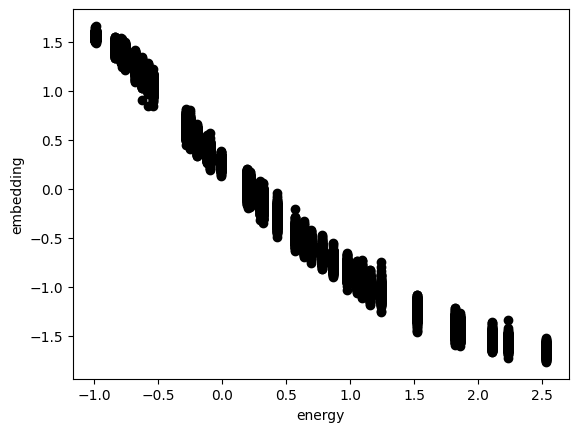

In [16]:
joint_ae_args = {
    "intermediate_dim": 128,
    "intermediate_layers": 5,
    "projection": IdProjection(3)
}
suite_dp = JointAutoencoderSuite(experiments.DoublePendulumHighEnergy, joint_ae_args=joint_ae_args)
conserved_dp, joint_ae_dp = suite_dp.train_all(save=False)

Using cpu device...
Constructing UMAP embedding
Finished preprocessing 120 events in 0.0009s
   714 / 7140  EMDs computed  -  10.00% completed - 4.827s
  1428 / 7140  EMDs computed  -  20.00% completed - 9.755s
  2142 / 7140  EMDs computed  -  30.00% completed - 14.734s
  2856 / 7140  EMDs computed  -  40.00% completed - 19.647s
  3570 / 7140  EMDs computed  -  50.00% completed - 24.610s
  4284 / 7140  EMDs computed  -  60.00% completed - 29.650s
  4998 / 7140  EMDs computed  -  70.00% completed - 34.671s
  5712 / 7140  EMDs computed  -  80.00% completed - 39.708s
  6426 / 7140  EMDs computed  -  90.00% completed - 44.701s
  7140 / 7140  EMDs computed  - 100.00% completed - 49.627s


/home/antony/.local/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")



Training conserved NN


100%|█████████████████████████████████████████| 100/100 [05:32<00:00,  3.32s/it]


Best loss: 0.013172021135687828

Training joint AE


100%|█████████████████████████████████████████| 200/200 [38:46<00:00, 11.63s/it]


Best loss: 0.0023247830104082823


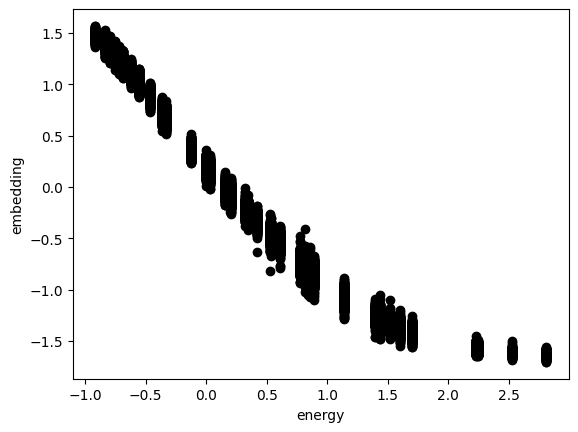

In [17]:
joint_ae_args = {
    "intermediate_dim": 128,
    "intermediate_layers": 5,
    "projection": SnProjection(3)
}
suite_dp = JointAutoencoderSuite(experiments.DoublePendulumHighEnergy, joint_ae_args=joint_ae_args)
conserved_dp, joint_ae_dp = suite_dp.train_all(save=False)